<a href="https://colab.research.google.com/github/JairEsc/Mat_Apl/blob/main/MN_T13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Regla de Simpson
import numpy as np
import scipy.special
def Simpson(f,a,b,n):
    h=(b-a)/3
    integral=0
    for i in range(1,n):
        print(i)
        if(i%2==1):
            a_0=a+h*(i-1)
            b_0=a+h*(i+1)
            h_0=(b_0-a_0)/3
            approx=(3*h_0/8)*(f(a_0)+f(b_0)+3*f(a_0+h_0)+3*f(a_0+2*h_0))
            integral+=approx
    return(integral)

In [ ]:
def f(x):
    return(1/x)
a=2
b=7
Simpson(f,a,b,6)

1
2
3
4
5


1.795341268744287

In [ ]:
#Newton-Legendre.
#El valor de n se define a medio codigo :/
def p(n,x):
    sum=0
    if(n==0):
        return 1
    if(n==1):
        return x
    valor=(1/n)*((2*n-1)*x*p(n-1,x)-(n-1)*p(n-2,x))
    return(valor)
def p_prima(n,x):
    return(((n)/(1-x**2))*(p(n-1,x)-x*p(n,x)))

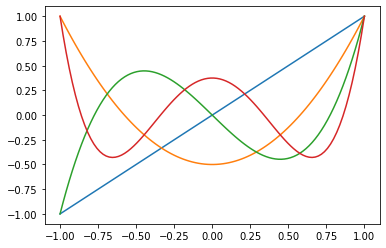

In [ ]:
x=np.linspace(-1,1,100)
import matplotlib.pyplot as plt
for k in range(1,5):
    n=k
    plt.plot(x,p(n,x))

In [ ]:
def Newton(f, fprime, x_0,tol_x=0,tol_f=10**(-6),iter_max=10000):
  #Input: f, f', x_0,
  #         tol_x: Tolerancia del tamaño del intervalo (default=0)
  #         tol_f: Tolerancia, criterio de paro (default=10^{-6})
  if(fprime(x_0)==0):
    return('considere otro valor inicial')
  else: 
    x_1=x_0-f(x_0)/fprime(x_0)
  iter=1
  while (abs(f(x_1))>tol_f) & (abs(x_0-x_1)>tol_x) & (iter<iter_max):
    if(fprime(x_1)==0): 
      break
    else:
      x_0=x_1
      x_1=x_0-f(x_0)/fprime(x_0)
      iter+=1
  return x_1

In [ ]:
n=4
def zeros_pol_Legendre(m):
    n=m# n es la variable para construir los polinomios de Legendre de grado n.

    def p_n(x):
        return(p(n,x))
    def p_prima_n(x):
        return(p_prima(n,x))
    x_0_k=[np.cos(np.pi*(k+0.75)/(n+0.5)) for k in range(n)]
    zeros=[]
    for x_0 in x_0_k:
        zeros.append(Newton(p_n,p_prima_n,x_0,tol_f=10**(-12)))
    return(zeros)
zeros=zeros_pol_Legendre(n)
print(zeros)

[0.8611363115940539, 0.33998104358485626, -0.33998104358485626, -0.8611363115940539]


In [ ]:
a=[]
for x in zeros:
    a.append(2/(((1-x**2))*(p_prima(n,x)**2)))
print(a)

[0.34785484513745085, 0.6521451548625463, 0.6521451548625463, 0.34785484513745085]


0.8888888888888888